<a href="https://colab.research.google.com/github/barrosm/BIMASTER_CODE_PUBLIC/blob/main/003_leitura_dados_diarios_cvm_20210218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados diários de fundos de investimentos

### Data: 11/02/2021


Mês início = 09/2020
Mês final = 02/2021 (parcial)

In [ ]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
current_dir = os.getcwd()
current_dir

from time import perf_counter
import pickle

In [ ]:
os.chdir('..')  # vai um nível para cima
current_dir = os.getcwd()
current_dir

path = '/home/jovyan/work/@Fund_Eval/CVM/Diario/' #Linux
#path = current_dir + '\\CVM\\Diario\\'  #Windows
os.makedirs(path, exist_ok = 'TRUE')

path_result = '/home/jovyan/work/@Fund_Eval/PROGRAMAS/'
os.makedirs(path_result, exist_ok = 'TRUE')

#path_result = '/home/jovyan/work/@Fund_Eval/CVM/Diario/'
#os.makedirs(path_result, exist_ok = 'TRUE')

path_data = '/home/jovyan/work/@Fund_Eval/@dados_acoes/'
os.makedirs(path_data, exist_ok = 'TRUE')

path_code = '/home/jovyan/work/@Fund_Eval/PROGRAMAS/'
os.makedirs(path_code, exist_ok = 'TRUE')

In [ ]:
# REMOTE PATH
remote_path = '/home/jupyter/Notebooks/monica/@Fund_Eval/CVM/Diario/'

In [ ]:
current_dir

'/home/jovyan/work'

In [ ]:
url_address = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_'

In [ ]:
ct = [ '202009', '202010', '202011', '202012', '202101', '202102']

In [ ]:
start_month = ct[0]
end_month = ct[-1]

In [ ]:
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'

In [ ]:
arq_names = [url_address + i + '.csv' for i in ct]

In [ ]:
arq_names[-5:]

['http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202010.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202011.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202012.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202101.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202102.csv']

In [ ]:
# Número de arquivos (meses) lidos 
len(arq_names)

6

In [ ]:
# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ

In [ ]:
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs
 **** a leitura dos dados demorou  36.4  segundos *****


In [ ]:
#df.head(3)
#df.tail(3)

In [ ]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,00.017.024/0001-53,2020-09-01,1109980.23,27.529846,1110436.09,0.0,0.0,1
1,00.017.024/0001-53,2020-09-02,1110061.15,27.530474,1110461.43,0.0,0.0,1
2,00.017.024/0001-53,2020-09-03,1110144.96,27.531079,1110485.83,0.0,0.0,1


## Salva dataframe com todos os dados diários em arquivo pkl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160655 entries, 0 to 2160654
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 131.9+ MB


In [ ]:
path

'/home/jovyan/work/@Fund_Eval/CVM/Diario/'

In [ ]:
filename

'df_diario_202009_202102.pkl'

In [ ]:
time_start = perf_counter()

#df.to_pickle(remote_path+filename) # changed to remote path
df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  5.74  segundos *****


## Cálculo do Retorno diário

In [ ]:
df2 = df.copy()
df2["Return"] = df2.groupby("CNPJ_FUNDO")["VL_QUOTA"].pct_change(1)*100.0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160655 entries, 0 to 2160654
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   Return         float64
dtypes: float64(6), int64(1), object(2)
memory usage: 148.4+ MB


In [ ]:
# se deu encrenca e o kernel morreu, reler df = pd.read_pickle(path+filename)

In [ ]:
time_start = perf_counter()

#df2.to_pickle(filename)
#df.to_pickle(remote_path+filename) # changed to remote path
df2.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  6.07  segundos *****


In [ ]:
#df[['DT_COMPTC', 'VL_QUOTA', 'Return']][df['CNPJ_FUNDO']=='97.929.213/0001-34']

In [ ]:
# Example - return of a randomly chosen fund

#numpy.random.randint(low, high=None, size=None, dtype='l')
random_row = np.random.randint(0,len(df2))
random_cnpj = df2['CNPJ_FUNDO'].iloc[random_row,]
random_cnpj

'36.015.243/0001-40'

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160655 entries, 0 to 2160654
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CNPJ_FUNDO     object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   Return         float64
dtypes: float64(6), int64(1), object(2)
memory usage: 148.4+ MB


In [ ]:
df_to_plot = df2[['CNPJ_FUNDO','DT_COMPTC','Return']].copy()

In [ ]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160655 entries, 0 to 2160654
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CNPJ_FUNDO  object 
 1   DT_COMPTC   object 
 2   Return      float64
dtypes: float64(1), object(2)
memory usage: 49.5+ MB


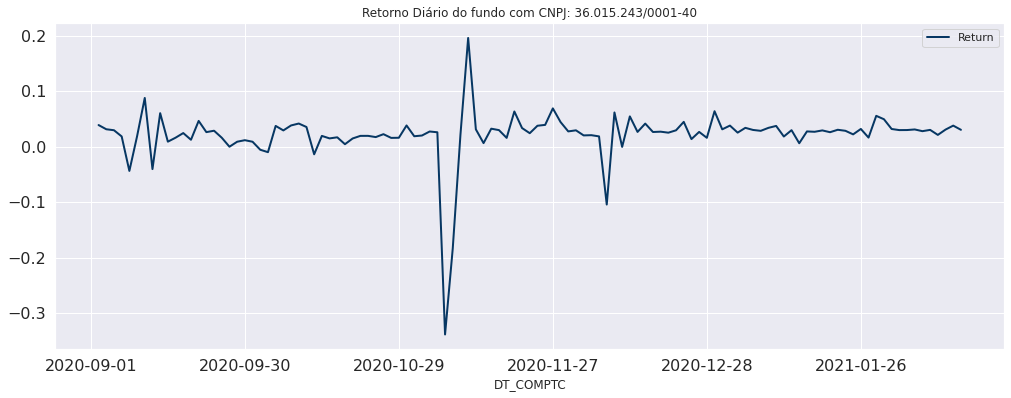

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df_to_plot[['DT_COMPTC','Return']][df_to_plot['CNPJ_FUNDO']==random_cnpj].set_index('DT_COMPTC').plot(title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                                                                     fontsize = 16, linewidth = 2.0, color = '#073763');

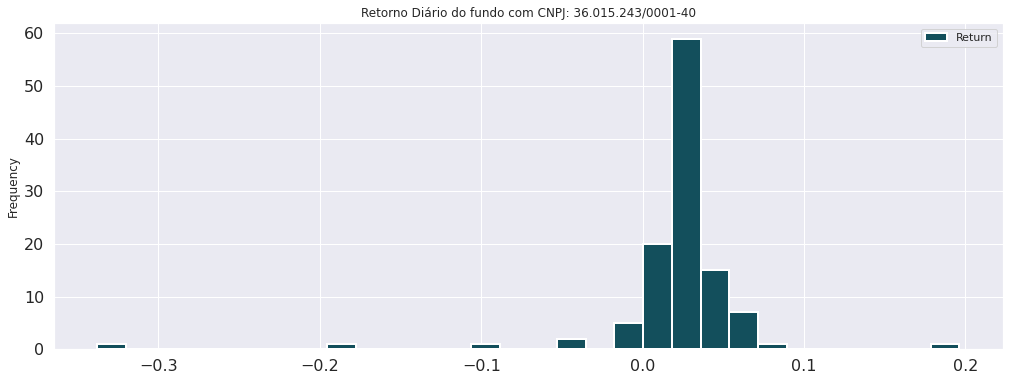

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df2[['Return']][df2['CNPJ_FUNDO']==random_cnpj].plot.hist(bins = 30, title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                        fontsize = 16, linewidth = 2.0, color = '#134f5c');

In [ ]:
# Show days where return below 1% for randomly selected fund

df2[['DT_COMPTC','Return']][(df2['CNPJ_FUNDO']==random_cnpj )& (df2['Return'] < -1)].set_index('DT_COMPTC')

,Return
DT_COMPTC,


## Salva dataframe incluindo retornos diários em arquivo csv

In [ ]:
time_start = perf_counter()
df2.to_csv(path+'df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')
#df2.to_csv('df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  190.99  segundos *****
